In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ransomwaredata/RansomwareData.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
your_dataset_path = '/kaggle/input/ransomwaredata/RansomwareData.csv'
df = pd.read_csv(your_dataset_path, header=None)

In [3]:
df.shape

(1524, 30970)

In [4]:
# Generate column names from (1, 30971)

column_names = [str(i) for i in range(1,30971)]
df.columns = column_names

In [5]:
import pandas as pd

# Assuming 'data' is your DataFrame
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows.shape)


Duplicate Rows:
(0, 30970)


In [6]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '30961', '30962', '30963', '30964', '30965', '30966', '30967', '30968',
       '30969', '30970'],
      dtype='object', length=30970)

In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Columns where all values are 0
columns_with_all_zeros = df.columns[(df == 0).all()]

# Columns where all values are 1
columns_with_all_ones = df.columns[(df == 1).all()]

# Display the columns
print("Number of columns with 0:", columns_with_all_zeros.shape)
print("Number of columns with 1:", columns_with_all_ones.shape)


Number of columns with 0: (7351,)
Number of columns with 1: (0,)


In [8]:

# Identifier les doublons basés sur toutes les colonnes (en excluant les occurrences originales)
duplicates= df[df.duplicated()]

# Compter le nombre total de doublons (en excluant les occurrences originales)
total_duplicate_count = duplicates.shape[0]

# Compter le nombre de doublons qui sont des ransomwares (colonne '2' égale à 1)
ransomware_duplicates_count = duplicates[duplicates['2'] == 1].shape[0]

# Compter le nombre de doublons qui sont des goodwares (colonne '2' égale à 0)
goodware_duplicates_count = duplicates[duplicates['2'] == 0].shape[0]

# Afficher les résultats
print("Nombre total de doublons (en excluant les occurrences originales):", total_duplicate_count)
print("Nombre de doublons qui sont des ransomwares:", ransomware_duplicates_count)
print("Nombre de doublons qui sont des goodwares:", goodware_duplicates_count)




Nombre total de doublons (en excluant les occurrences originales): 0
Nombre de doublons qui sont des ransomwares: 0
Nombre de doublons qui sont des goodwares: 0


In [9]:

# Compter le nombre de qui sont des ransomwares (colonne '2' égale à 1)
ransomware_df_count = df[df['2'] == 1].shape[0]

# Compter le nombre de qui sont des goodwares (colonne '2' égale à 0)
goodware_df_count = df[df['2'] == 0].shape[0]

# Afficher les résultats

print("Nombre  des ransomwares:",ransomware_df_count)
print("Nombre d des goodwares:",goodware_df_count)


Nombre  des ransomwares: 582
Nombre d des goodwares: 942


In [10]:

# Count the number of samples in each class
ransomware_df_count = df[df['2'] == 1].shape[0]
goodware_df_count = df[df['2'] == 0].shape[0]
print("ransomware", ransomware_df_count)
print("goodware", goodware_df_count)

ransomware 582
goodware 942


In [11]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '30961', '30962', '30963', '30964', '30965', '30966', '30967', '30968',
       '30969', '30970'],
      dtype='object', length=30970)

In [12]:
df = df.drop(columns=['1'])
# Drop the first column as instructed

print(df.columns[:55])
# Use the `all()` function to check if all values in each column are 0
zero_columns = df.columns[df.eq(0).all()]

# Drop columns with all zeros
data = df.drop(zero_columns, axis=1)

# Display the names of the remaining columns
print(data.columns[:55])



Index(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
       '51', '52', '53', '54', '55', '56'],
      dtype='object')
Index(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
       '53', '54', '55', '56', '57', '58'],
      dtype='object')


In [13]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Display the original DataFrame shape
print("Original DataFrame shape:", data.shape)

# Initialize VarianceThreshold with a threshold value (you can adjust this value)
threshold_value = 0.01  # You may adjust this threshold
variance_selector = VarianceThreshold(threshold=threshold_value)

# Fit and transform the selector on the entire dataset
selected_data = variance_selector.fit_transform(data)

# Get the indices of the features to keep
selected_features_indices = variance_selector.get_support(indices=True)

# Keep the selected features in the DataFrame
selected_columns = list(data.columns[selected_features_indices])
selected_df = pd.DataFrame(selected_data, columns=selected_columns)

# Display the shape of the DataFrame after feature selection
print("DataFrame shape after feature selection:", selected_df.shape)

# Display the selected DataFrame
print("Selected DataFrame:")
print(selected_df.head())



Original DataFrame shape: (1524, 23618)
DataFrame shape after feature selection: (1524, 931)
Selected DataFrame:
   2  3  4  6  8  9  10  11  12  14  ...  29079  29218  29287  29758  29769  \
0  1  2  0  0  0  0   0   0   0   0  ...      0      0      0      0      0   
1  1  3  1  1  1  0   1   0   0   0  ...      0      0      0      0      0   
2  1  2  0  0  0  0   0   0   0   0  ...      0      0      0      0      1   
3  1  5  0  0  1  0   0   0   0   0  ...      0      0      0      0      1   
4  1  7  1  1  0  1   1   0   1   0  ...      0      0      0      0      0   

   29770  29796  29903  30200  30285  
0      0      0      0      0      0  
1      0      0      0      0      0  
2      0      0      0      0      0  
3      0      0      0      1      0  
4      0      0      0      0      0  

[5 rows x 931 columns]


In [14]:
selected_df.columns


Index(['2', '3', '4', '6', '8', '9', '10', '11', '12', '14',
       ...
       '29079', '29218', '29287', '29758', '29769', '29770', '29796', '29903',
       '30200', '30285'],
      dtype='object', length=931)

In [15]:
from sklearn.model_selection import train_test_split

# Define the unseen and seen class IDs
unseen_classes_ids = [8, 9, 11]  # IDs of unseen ransomware classes
seen_classes_ids = [1, 2, 3, 4, 5, 6, 7, 10]  # IDs of seen ransomware classes plus goodware
# Use .loc to create the 'Label' column without the SettingWithCopyWarning
selected_df.loc[:, 'Label'] = selected_df['3'].astype(int)


In [16]:
# Separate the unseen ransomware data
unseen_ransomware_data = selected_df[selected_df['Label'].isin(unseen_classes_ids)].copy()

# Separate the seen ransomware data
seen_ransomware_data = selected_df[~selected_df['Label'].isin(unseen_classes_ids + [0])].copy()

# Goodware samples
goodware_data = selected_df[selected_df['Label'] == 0].copy()

goodware_data = goodware_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Now we split the goodware data based on the count needed for the training set
goodware_train = goodware_data.iloc[:809, :].copy()
goodware_unseen = goodware_data.iloc[809:, :].copy()

train_data = pd.concat([seen_ransomware_data, goodware_train])

# Split the train data into actual training and validation sets
y_train = train_data['2']
X_train = train_data.drop(columns=['2', 'Label', '3'])

# Use .loc to avoid the SettingWithCopyWarning
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train, y_train, test_size=(257/1257), stratify=y_train, random_state=42  # ~20% for validation to make a total of 1257
)

# Prepare the unseen data
unseen_data = pd.concat([unseen_ransomware_data, goodware_unseen])
y_unseen = unseen_data['2']
X_unseen = unseen_data.drop(columns=['2', 'Label', '3'])

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Assuming X_train, X_validate, y_train, X_unseen, and y_unseen are already defined from the previous code

# Initialize the Random Forest classifier
rf_classif = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf_classif.fit(X_train, y_train)

# Make predictions on the validation set
y_validate_pred = rf_classif.predict(X_validate)

# Evaluate the accuracy of the model on the validation set
accuracy_validate = accuracy_score(y_validate, y_validate_pred)
print(f"Accuracy on Validation Set: {accuracy_validate:.2f}")

# Make predictions on the unseen data
y_unseen_pred = rf_classif.predict(X_unseen)

# Evaluate the accuracy of the model on the unseen data
accuracy_unseen = accuracy_score(y_unseen, y_unseen_pred)
print(f"Accuracy on Unseen Data: {accuracy_unseen:.2f}")

# Generate and display the confusion matrix for the unseen data
conf_matrix_unseen = confusion_matrix(y_unseen, y_unseen_pred)
print("Confusion Matrix on Unseen Data:")
print(pd.DataFrame(conf_matrix_unseen, index=rf_classif.classes_, columns=rf_classif.classes_))

# Display the classification report for the unseen data
print("Classification Report on Unseen Data:")
print(classification_report(y_unseen, y_unseen_pred))


Accuracy on Validation Set: 0.98
Accuracy on Unseen Data: 0.95
Confusion Matrix on Unseen Data:
     0    1
0  130    3
1   11  117
Classification Report on Unseen Data:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.97      0.91      0.94       128

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261



In [18]:
# Get feature importances
feature_importances = rf_classif.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.head(50))

Top Features:
    Feature  Importance
821   14267    0.034426
828   14747    0.032232
83      122    0.031846
4        10    0.031172
124     170    0.027275
176     332    0.019355
44       67    0.017027
146     200    0.015819
777   12043    0.015283
107     151    0.015028
750   11686    0.014585
143     196    0.014195
923   29769    0.013906
52       77    0.013356
56       84    0.012886
882   23286    0.012817
863   20049    0.011589
741   11587    0.010651
72      104    0.010205
872   21986    0.009931
306    2018    0.009732
55       82    0.009481
125     171    0.009470
138     190    0.008974
670    7121    0.008713
118     164    0.008688
894   24730    0.008328
768   11928    0.007826
37       57    0.007401
28       44    0.007329
492    3965    0.006807
169     232    0.006603
790   12244    0.006488
189     543    0.006389
461    3668    0.006137
113     159    0.006111
852   18253    0.006004
682    7982    0.005787
16       25    0.005719
649    5574    0.005587
10

In [19]:

# Display only the names of the top features
top_feature_names = feature_importance_df['Feature'].head(25).tolist()
print("Top Feature Names:")
print(top_feature_names)

Top Feature Names:
['14267', '14747', '122', '10', '170', '332', '67', '200', '12043', '151', '11686', '196', '29769', '77', '84', '23286', '20049', '11587', '104', '21986', '2018', '82', '171', '190', '7121']


# # **Now we will work with the Top 25 features with high Importance**

In [20]:
# List of Top Feature Names
top_feature_names = ['14267', '14747', '122', '10', '170', '332', '67', '200', '12043', '151', '11686', '196', '29769', '77', '84', '23286', '20049', '11587', '104', '21986', '2018', '82', '171', '190', '7121']

# Add columns '2' and '3' to the list of columns to extract
columns_to_extract = ['2', '3'] + top_feature_names 

# Extract selected columns from the DataFrame

selected_features_df = pd.DataFrame(selected_df, columns=columns_to_extract)


# Display the extracted DataFrame
print(selected_features_df.head())


   2  3  14267  14747  122  10  170  332  67  200  ...  23286  20049  11587  \
0  1  2      0      1    0   0    0    0   0    0  ...      0      0      0   
1  1  3      0      0    0   1    0    0   0    1  ...      0      0      1   
2  1  2      0      1    0   0    0    0   0    0  ...      0      0      0   
3  1  5      0      1    0   0    0    0   0    0  ...      0      0      0   
4  1  7      0      0    0   1    0    0   1    1  ...      0      0      1   

   104  21986  2018  82  171  190  7121  
0    0      0     0   0    0    0     0  
1    0      0     0   0    1    0     0  
2    0      1     0   0    0    0     0  
3    0      0     0   0    0    0     0  
4    0      0     0   0    1    1     0  

[5 rows x 27 columns]


In [21]:
from sklearn.model_selection import train_test_split
# Define the unseen and seen class IDs
unseen_classes_ids = [8, 9, 11]  # IDs of unseen ransomware classes
seen_classes_ids = [1, 2, 3, 4, 5, 6, 7, 10]  # IDs of seen ransomware classes plus goodware
# Use .loc to create the 'Label' column without the SettingWithCopyWarning
selected_features_df.loc[:, 'Label'] = selected_features_df['3'].astype(int)



In [22]:
# Separate the unseen ransomware data
unseen_ransomware_data1 = selected_features_df[selected_features_df['Label'].isin(unseen_classes_ids)].copy()

# Separate the seen ransomware data
seen_ransomware_data1 = selected_features_df[~selected_features_df['Label'].isin(unseen_classes_ids + [0])].copy()

# Goodware samples
goodware_data1 = selected_features_df[selected_features_df['Label'] == 0].copy()

goodware_data1 = goodware_data1.sample(frac=1, random_state=42).reset_index(drop=True)

# Now we split the goodware data based on the count needed for the training set
goodware_train1 = goodware_data1.iloc[:809, :].copy()
goodware_unseen1 = goodware_data1.iloc[809:, :].copy()

train_data1 = pd.concat([seen_ransomware_data1, goodware_train1])

# Split the train data into actual training and validation sets
y_train1 = train_data1['2']
X_train1 = train_data1.drop(columns=['2', 'Label', '3'])

# Use .loc to avoid the SettingWithCopyWarning
X_train1, X_validate1, y_train1, y_validate1= train_test_split(
    X_train1, y_train1, test_size=(257/1257), stratify=y_train1, random_state=42  # ~20% for validation to make a total of 1257
)

# Prepare the unseen data
unseen_data1 = pd.concat([unseen_ransomware_data1, goodware_unseen1])
y_unseen1 = unseen_data1['2']
X_unseen1 = unseen_data1.drop(columns=['2', 'Label', '3'])

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train, X_validate, y_train, X_unseen, and y_unseen are already defined from the previous code

# Initialize the Random Forest classifier
rf_classif1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf_classif1.fit(X_train1, y_train1)

# Make predictions on the validation set
y_validate_pred1 = rf_classif1.predict(X_validate1)

# Evaluate the accuracy of the model on the validation set
accuracy_validate1 = accuracy_score(y_validate1, y_validate_pred1)
print(f"Accuracy on Validation Set: {accuracy_validate1:.2f}")

# Generate and display the confusion matrix for the validation set
conf_matrix_validate1 = confusion_matrix(y_validate1, y_validate_pred1)
print("Confusion Matrix on Validation Set:")
print(pd.DataFrame(conf_matrix_validate1, index=rf_classif1.classes_, columns=rf_classif1.classes_))

# Display the classification report for the validation set
print("Classification Report on Validation Set:")
print(classification_report(y_validate1, y_validate_pred1))

# Make predictions on the unseen data
y_unseen_pred1 = rf_classif1.predict(X_unseen1)

# Evaluate the accuracy of the model on the unseen data
accuracy_unseen1 = accuracy_score(y_unseen1, y_unseen_pred1)
print(f"Accuracy on Unseen Data: {accuracy_unseen1:.2f}")

# Generate and display the confusion matrix for the unseen data
conf_matrix_unseen1 = confusion_matrix(y_unseen1, y_unseen_pred1)
print("Confusion Matrix on Unseen Data:")
print(pd.DataFrame(conf_matrix_unseen1, index=rf_classif1.classes_, columns=rf_classif1.classes_))

# Display the classification report for the unseen data
print("Classification Report on Unseen Data:")
print(classification_report(y_unseen1, y_unseen_pred1))


Accuracy on Validation Set: 0.97
Confusion Matrix on Validation Set:
     0   1
0  164   2
1    5  88
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       166
           1       0.98      0.95      0.96        93

    accuracy                           0.97       259
   macro avg       0.97      0.97      0.97       259
weighted avg       0.97      0.97      0.97       259

Accuracy on Unseen Data: 0.95
Confusion Matrix on Unseen Data:
     0    1
0  130    3
1   10  118
Classification Report on Unseen Data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       133
           1       0.98      0.92      0.95       128

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261



Text(0.5, 36.72222222222221, 'Predicted')

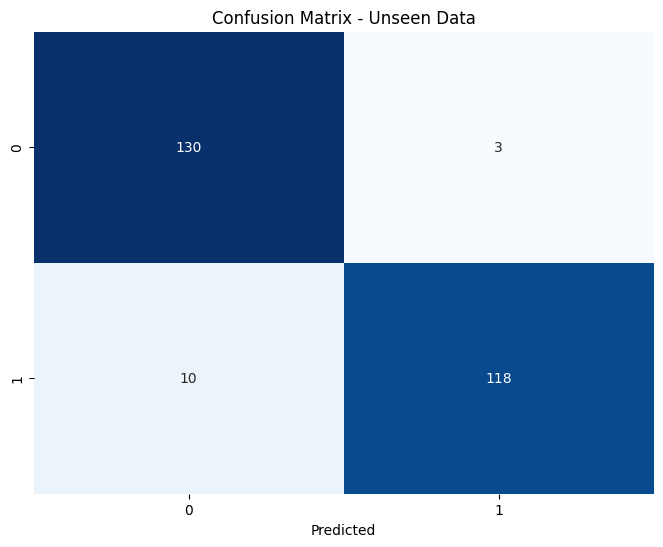

In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_unseen1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_unseen1), yticklabels=np.unique(y_unseen1))
plt.title('Confusion Matrix - Unseen Data')
plt.xlabel('Predicted')

Confusion Matrix on Validation Data:
     0   1
0  164   2
1    5  88


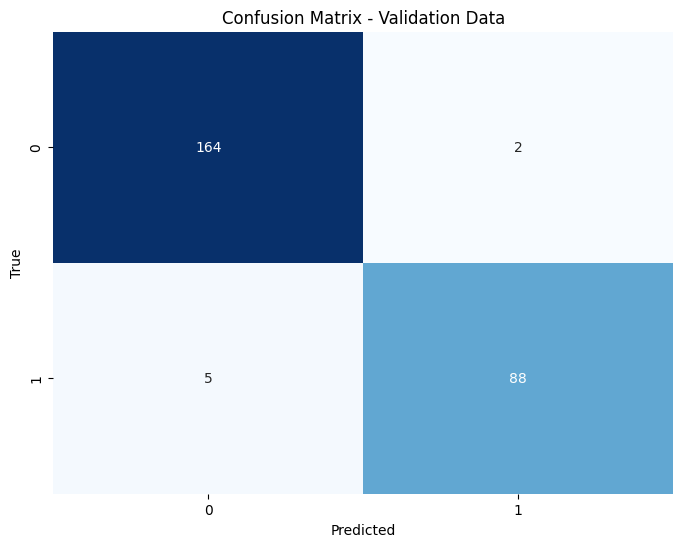

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the validation set
y_validate_pred1 = rf_classif1.predict(X_validate1)

# Generate and display the confusion matrix for the validation data
conf_matrix_validate1 = confusion_matrix(y_validate1, y_validate_pred1)
print("Confusion Matrix on Validation Data:")
print(pd.DataFrame(conf_matrix_validate1, index=rf_classif1.classes_, columns=rf_classif1.classes_))

# Display the confusion matrix for the validation data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_validate1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_unseen1), yticklabels=np.unique(y_unseen1))
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **SVM**

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train, X_validate, y_train, X_unseen, and y_unseen are already defined from the previous code

# Preprocess Data: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_validate_scaled = scaler.transform(X_validate1)
X_unseen_scaled = scaler.transform(X_unseen1)

# Create and train SVM model
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train1)

# Make predictions on validation set
y_validate_pred_svm = svm_classifier.predict(X_validate_scaled)

# Evaluate the performance on validation set
accuracy_svm_validate = accuracy_score(y_validate1, y_validate_pred_svm)
conf_matrix_svm_validate = confusion_matrix(y_validate1, y_validate_pred_svm)
classification_rep_svm_validate = classification_report(y_validate1, y_validate_pred_svm)

print(f"Accuracy on Validation Set (SVM): {accuracy_svm_validate:.2f}")
print("Confusion Matrix (SVM) on Validation Set:")
print(conf_matrix_svm_validate)
print("Classification Report (SVM) on Validation Set:")
print(classification_rep_svm_validate)

# Make predictions on unseen data
y_unseen_pred_svm = svm_classifier.predict(X_unseen_scaled)

# Evaluate the performance on unseen data
accuracy_svm_unseen = accuracy_score(y_unseen1, y_unseen_pred_svm)
conf_matrix_svm_unseen = confusion_matrix(y_unseen1, y_unseen_pred_svm)
classification_rep_svm_unseen = classification_report(y_unseen1, y_unseen_pred_svm)

print(f"Accuracy on Unseen Data (SVM): {accuracy_svm_unseen:.2f}")
print("Confusion Matrix (SVM) on Unseen Data:")
print(conf_matrix_svm_unseen)
print("Classification Report (SVM) on Unseen Data:")
print(classification_rep_svm_unseen)


Accuracy on Validation Set (SVM): 0.97
Confusion Matrix (SVM) on Validation Set:
[[164   2]
 [  5  88]]
Classification Report (SVM) on Validation Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       166
           1       0.98      0.95      0.96        93

    accuracy                           0.97       259
   macro avg       0.97      0.97      0.97       259
weighted avg       0.97      0.97      0.97       259

Accuracy on Unseen Data (SVM): 0.95
Confusion Matrix (SVM) on Unseen Data:
[[131   2]
 [ 12 116]]
Classification Report (SVM) on Unseen Data:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.98      0.91      0.94       128

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261



In [27]:
print(X_train_scaled)

[[-0.93254822 -0.55894392 -1.03034055 ... -0.58655165 -0.28208136
  -0.19560846]
 [ 1.07233061 -0.55894392  0.97055289 ... -0.58655165 -0.28208136
  -0.19560846]
 [-0.93254822 -0.55894392 -1.03034055 ... -0.58655165 -0.28208136
  -0.19560846]
 ...
 [ 1.07233061 -0.55894392  0.97055289 ... -0.58655165 -0.28208136
  -0.19560846]
 [-0.93254822 -0.55894392 -1.03034055 ...  1.7048797  -0.28208136
  -0.19560846]
 [ 1.07233061 -0.55894392  0.97055289 ... -0.58655165 -0.28208136
  -0.19560846]]


# ANN****

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Set random seed for reproducibility


# Assuming X_train_scaled, X_validate_scaled, y_train1, X_unseen_scaled, and y_unseen1 are already defined from the previous code

# Define the model
model = Sequential()

# Add input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add a second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set
model.fit(X_train_scaled, y_train1, epochs=10, batch_size=32, validation_data=(X_validate_scaled, y_validate1))

# Evaluate the model on the unseen data
accuracy_unseen_ann = model.evaluate(X_unseen_scaled, y_unseen1)[1]
print(f"Accuracy on Unseen Data (ANN): {accuracy_unseen_ann:.2f}")


Epoch 1/10
32/32 [==============================] - 1s 13ms/step - loss: 0.4388 - accuracy: 0.8376 - val_loss: 0.2591 - val_accuracy: 0.9575
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.9592 - val_loss: 0.1653 - val_accuracy: 0.9537
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9602 - val_loss: 0.1321 - val_accuracy: 0.9575
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.9741 - val_loss: 0.1162 - val_accuracy: 0.9575
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0879 - accuracy: 0.9731 - val_loss: 0.1140 - val_accuracy: 0.9614
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.9751 - val_loss: 0.1162 - val_accuracy: 0.9575
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0692 - accuracy: 0.9771 - val_loss: 0.0999 - val_accuracy: 0.9768
Epoch 8/10
32/32 [=

9/9 [==============================] - 0s 2ms/step
Confusion Matrix for ANN on Validation Data:
[[164   2]
 [  4  89]]
Classification Report for ANN on Validation Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       166
           1       0.98      0.96      0.97        93

    accuracy                           0.98       259
   macro avg       0.98      0.97      0.97       259
weighted avg       0.98      0.98      0.98       259



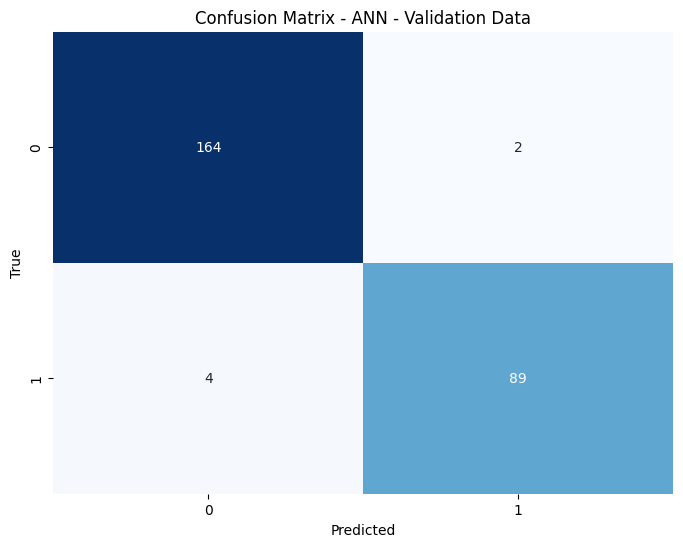

In [29]:
# Make predictions on the validation data
y_validate_pred_ann = (model.predict(X_validate_scaled) > 0.5).astype("int32")

# Flatten the predictions and true labels
y_validate_flat = np.squeeze(y_validate1)
y_validate_pred_flat = np.squeeze(y_validate_pred_ann)

# Generate and display the confusion matrix for the validation data
conf_matrix_validate_ann = confusion_matrix(y_validate_flat, y_validate_pred_flat)
print("Confusion Matrix for ANN on Validation Data:")
print(conf_matrix_validate_ann)

# Display the classification report for the validation data
print("Classification Report for ANN on Validation Data:")
print(classification_report(y_validate_flat, y_validate_pred_flat))

# Display a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_validate_ann, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_validate_flat), yticklabels=np.unique(y_validate_flat))
plt.title('Confusion Matrix - ANN - Validation Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [30]:
print(f"Accuracy on Unseen Data (ANN): {accuracy_unseen_ann:.2f}")


Accuracy on Unseen Data (ANN): 0.95


9/9 [==============================] - 0s 2ms/step
Confusion Matrix for ANN on Unseen Data:
[[132   1]
 [ 13 115]]
Classification Report for ANN on Unseen Data:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       133
           1       0.99      0.90      0.94       128

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261



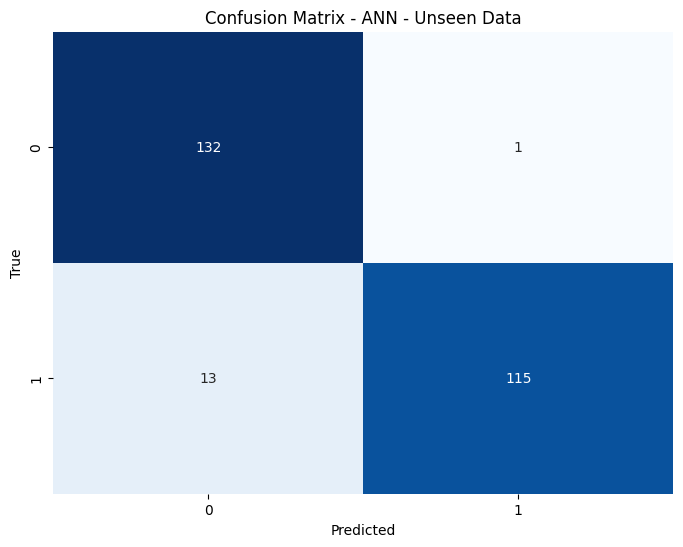

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the unseen data
y_unseen_pred_ann = (model.predict(X_unseen_scaled) > 0.5).astype("int32")

# Flatten the predictions and true labels
y_unseen_flat = np.squeeze(y_unseen1)
y_unseen_pred_flat = np.squeeze(y_unseen_pred_ann)

# Generate and display the confusion matrix for the unseen data
conf_matrix_unseen_ann = confusion_matrix(y_unseen_flat, y_unseen_pred_flat)
print("Confusion Matrix for ANN on Unseen Data:")
print(conf_matrix_unseen_ann)

# Display the classification report for the unseen data
print("Classification Report for ANN on Unseen Data:")
print(classification_report(y_unseen_flat, y_unseen_pred_flat))

# Display a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_unseen_ann, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_unseen_flat), yticklabels=np.unique(y_unseen_flat))
plt.title('Confusion Matrix - ANN - Unseen Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
